In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import cv2
import os
import math
import pandas as pd

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from tensorflow.keras import backend #Keras version 2.1.6
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Concatenate

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(33)

2023-07-20 15:34:50.124857: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = '1'
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession



config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9
sess = tf.Session(config = config)

2023-07-20 15:34:51.713879: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-20 15:34:51.715576: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-07-20 15:34:51.790483: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b3:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2023-07-20 15:34:51.790539: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-07-20 15:34:51.795253: I tensorflow/stream_executor/platform/default

In [3]:
# df = pd.read_csv('/mnt/harry/air_quality/Program/backup/Merge_Balance_EPA_Dataset_day_nonodia.csv')
df = pd.read_csv('/mnt/harry/air_quality/Program/backup/Night_balance.csv')

# df = pd.read_csv('/mnt/harry/air_quality/Program/backup/Balance_EPA_Dataset_agumentation_renwu_night.csv')
# df1 = pd.read_csv('/mnt/harry/air_quality/Program/backup/Balance_EPA_Dataset_agumentation_linyuan_night.csv')
# df2 = pd.read_csv('/mnt/harry/air_quality/Program/backup/Balance_EPA_Dataset_agumentation_xitun_night.csv')
# df3 = pd.read_csv('/mnt/harry/air_quality/Program/backup/Balance_EPA_Dataset_agumentation_taixi_night.csv')
# df4 = pd.read_csv('/mnt/harry/air_quality/Program/backup/Balance_EPA_Dataset_agumentation_douliu_night.csv')
# df5 = pd.read_csv('/mnt/harry/air_quality/Datasets/taoyuan/桃園_24h_new.csv')


# df = pd.read_csv('/mnt/harry/air_quality/Program/backup/Balance_EPA_Dataset_agumentation.csv')
# df = pd.read_csv('/mnt/harry/air_quality/Datasets/renwu/仁武_24h.csv')
# df1 = pd.read_csv('/mnt/harry/air_quality/Datasets/linyuan/林園_24h.csv')
# df2 = pd.read_csv('/mnt/harry/air_quality/Datasets/xitun/西屯_24h.csv')
# df3 = pd.read_csv('/mnt/harry/air_quality/Datasets/taixi/台西_24h.csv')
# df4 = pd.read_csv('/mnt/harry/air_quality/Datasets/douliu/斗六_24h.csv')
# df5 = pd.read_csv('/mnt/harry/air_quality/Datasets/taoyuan/桃園_24h_new.csv')

In [4]:
# df = pd.concat([df, df1, df2, df3, df4])

In [5]:
df = df.sample(frac=1, random_state=42)

# 重置索引
df = df.reset_index(drop=True)

In [6]:
#append '.jpg' to the filename column

def append_ext(fn):
    if fn.endswith(".jpg"):
        return fn 
    else:
        return fn + '.jpg'

In [7]:
df['filename'] = df['filename'].astype(str).apply(append_ext)
df

# df_og['filename'] = df_og['filename'].astype(str).apply(append_ext)
# df_og

,filename,pm2.5_concentration
0,41_201907272000_r.jpg,9.0
1,32_202003181900_r.jpg,55.0
2,41_202001230500.jpg,88.0
3,37_202002250100_r.jpg,78.0
4,37_201911192200.jpg,12.0
...,...,...
643,49_202001061900_r.jpg,56.0
644,Magaland_202307010100_5.jpg,201.0
645,antalya_202307020100_7r.jpg,226.5
646,37_202003010200.jpg,44.0


In [8]:
# df_all = pd.concat([df,df_og])

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:

# # creating instance of labelencoder
# labelencoder = LabelEncoder()

# # Assigning numerical values and storing in another column
# df['pm2.5_label'] = labelencoder.fit_transform(df['pm2.5_concentration'])
# #df.drop('pm2.5_concentration', axis=1)
# del df['pm2.5_concentration']
# df

In [11]:
y = []
for i in range(len(df)):
    try:
        imgtest = image.load_img('/mnt/harry/air_quality/Datasets/all_EPA_24h_reverse/all_EPA_24h/'+df.iloc[i, 0])
        imgtest = image.img_to_array(imgtest)
        if np.all(imgtest[:,:,0] == imgtest[:,:,1]) and np.all(imgtest[:,:,1] == imgtest[:,:,2]): #if night

#             pass
            y.append(df.iloc[i, 1])
        else:#if day

            pass
            
#             y.append(df.iloc[i, 1])
    except FileNotFoundError:
        print(df.iloc[i, 0])
        pass


    

In [12]:
y

[9.0,
 55.0,
 88.0,
 78.0,
 12.0,
 153.0,
 36.0,
 14.0,
 350.0,
 18.0,
 43.0,
 319.0,
 16.0,
 273.0,
 72.0,
 40.0,
 11.0,
 273.0,
 153.0,
 411.0,
 36.0,
 98.0,
 201.0,
 10.0,
 273.0,
 201.0,
 226.5,
 320.0,
 19.0,
 15.0,
 49.0,
 63.0,
 226.5,
 44.0,
 320.0,
 8.0,
 5.0,
 47.0,
 226.5,
 226.5,
 10.0,
 359.0,
 37.0,
 26.0,
 201.0,
 384.0,
 201.0,
 411.0,
 5.0,
 153.0,
 13.0,
 18.0,
 19.0,
 201.0,
 450.0,
 12.0,
 485.0,
 201.0,
 350.0,
 411.0,
 7.0,
 33.0,
 20.0,
 46.0,
 30.0,
 34.0,
 7.0,
 20.0,
 27.0,
 41.0,
 36.0,
 55.0,
 153.0,
 71.0,
 22.0,
 18.0,
 51.0,
 19.0,
 29.0,
 153.0,
 57.0,
 16.0,
 56.0,
 44.0,
 14.0,
 36.0,
 7.0,
 57.0,
 201.0,
 10.0,
 32.0,
 38.0,
 58.0,
 51.0,
 19.0,
 17.0,
 6.0,
 411.0,
 201.0,
 153.0,
 25.0,
 226.5,
 226.5,
 23.0,
 52.0,
 396.0,
 485.0,
 71.0,
 11.0,
 153.0,
 52.0,
 359.0,
 14.0,
 57.0,
 485.0,
 37.0,
 38.0,
 11.0,
 390.0,
 51.0,
 8.0,
 41.0,
 5.0,
 40.0,
 153.0,
 153.0,
 67.0,
 89.0,
 9.0,
 396.0,
 14.0,
 13.0,
 56.0,
 16.0,
 55.0,
 2.0,
 55.0,
 24.0,
 

In [13]:
len(y)

648

In [14]:
from sklearn.cluster import KMeans
from PIL import Image
def get_dark_channel(img, window_size):
    """
    將輸入的圖片轉換為 dark channel。
    
    Args:
        img: 輸入圖片，必須為三通道的彩色圖片。
        window_size: 窗口大小，應為正整數。
    
    Returns:
        輸出 dark channel 圖片。
    """
    # 計算 min filter。
    min_filter = cv2.erode(img, np.ones((window_size, window_size), np.uint8))
    
    # 取得 dark channel。
    dark_channel = np.min(min_filter, axis=1)
    
    return dark_channel
def sub_mean(img):
    img = img.copy()
    img = img.astype(np.float16)
    mean = np.array([127.0]).astype(np.float16)
    img -= mean
    return img
#     img = cv2.convertScaleAbs(img)
def nor(img):
    # 對每個通道，計算平均值和標準差
    means = np.mean(img)
    stds = np.std(img)

    # 將每個像素標準化
    normalized_img = (img - means) / stds
#     normalized_img = (normalized_img).astype(np.float16)
    # 轉換回圖像並保存
#     normalized_img = Image.fromarray(normalized_img)

    return normalized_img
def build_x(path):
    train_img = []
    df.reset_index()
    for i in range(len(df)): 
        print(i)
        try:
            img =  plt.imread(path + df.iloc[i, 0])
            img = image.img_to_array(img)
            if np.all(img[:,:,0] == img[:,:,1]) and np.all(img[:,:,1] == img[:,:,2]):#if night 
#                 hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
#                 sv_img = hsv_img[:,:,1:]
#                 img = sv_img
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
                img = img.astype(np.float64)
                
#                 print(img)
#                 img = cv2.convertScaleAbs(img)
                

#-----------------------------------------------------------------------------------                
#                 fil = np.array([[ 1,1, 0],                        #myfilter
#                 [ 1, 0, -0.8],
#                 [  0, -0.8, -0.8]])
#                 img = cv2.filter2D(img,-1,fil)   
 #--------------------------------------------------------------
#                 img = cv2.convertScaleAbs(img)
#                 img = cv2.medianBlur(img,5)
#                 sobelx = cv2.Sobel(img,cv2.CV_64F, 1,0, ksize=3)
#                 sobely = cv2.Sobel(img,cv2.CV_64F, 0,1, ksize=3)
#                 sobelx = cv2.convertScaleAbs(sobelx)
#                 sobely = cv2.convertScaleAbs(sobely)
#                 img = cv2.addWeighted(sobelx,0.5,sobely,0.5, 0)
#                 img = sobelx

#----------------------------------------------------------------------
#                 img = cv2.medianBlur(img,3)
#------------------------------------------------------------------------
#                 img = cv2.convertScaleAbs(img)
# #            CLAHE值方圖均衡化
#                 clahe = cv2.createCLAHE(clipLimit=2.0)
#                 img = clahe.apply(img)  
#                 img = img.astype(np.float16)
#                 img = cv2.medianBlur(img,7)
#                 img = sub_mean(img)
                img = nor(img)
#                 img = img/255.0
                img = np.expand_dims(img, axis=-1)
                train_img.append(img)
#                  pass
            else:#if day
                pass

# #                 img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
#                 img = img.astype(np.float32)


#  #--------------------------------------------------------------
# #                 img = cv2.convertScaleAbs(img)
# #                 img = cv2.medianBlur(img,5)
# #                 sobelx = cv2.Sobel(img,cv2.CV_64F, 1,0, ksize=3)
# #                 sobely = cv2.Sobel(img,cv2.CV_64F, 0,1, ksize=3)
# #                 sobelx = cv2.convertScaleAbs(sobelx)
# #                 sobely = cv2.convertScaleAbs(sobely)
# #                 img = cv2.addWeighted(sobelx,0.5,sobely,0.5, 0)
# #                 img = sobelx

# #----------------------------------------------------------------------
# #                 img = cv2.medianBlur(img,3)
# #------------------------------------------------------------------------
# #                 img = cv2.convertScaleAbs(img)
# # #            CLAHE值方圖均衡化
# #                 clahe = cv2.createCLAHE(clipLimit=2.0)
# #                 img = clahe.apply(img)  
# #                 img = img.astype(np.float16)
# #                 img = cv2.medianBlur(img,7)
# #                 img = sub_mean(img)
#                 img = nor(img)
# #                 img = img/255.0
# #                 img = np.expand_dims(img, axis=-1)
#                 train_img.append(img)
            
        except FileNotFoundError:
            pass

    x = np.array(train_img)
    print(x.shape)
    return x

In [15]:
from sklearn.cluster import KMeans
from PIL import Image
def get_dark_channel(img, window_size):
    """
    將輸入的圖片轉換為 dark channel。
    
    Args:
        img: 輸入圖片，必須為三通道的彩色圖片。
        window_size: 窗口大小，應為正整數。
    
    Returns:
        輸出 dark channel 圖片。
    """
    # 計算 min filter。
    min_filter = cv2.erode(img, np.ones((window_size, window_size), np.uint8))
    
    # 取得 dark channel。
    dark_channel = np.min(min_filter, axis=1)
    
    return dark_channel
def sub_mean(img):
    img = img.copy()
    img = img.astype(np.float16)
    mean = np.array([127.0]).astype(np.float16)
    img -= mean
    return img
#     img = cv2.convertScaleAbs(img)
def nor(img):
    # 對於每個通道，計算平均值和標準差
    means = np.mean(img)
    stds = np.std(img)

    # 將每個像素標準化
    normalized_img = (img - means) / stds

#     normalized_img = (normalized_img).astype(np.float16)
    # 轉換回圖像並保存
#     normalized_img = Image.fromarray(normalized_img)

    return normalized_img
def build_x2(path):
    train_img = []
    df.reset_index()
    for i in range(len(df)): 
        print(i)
        try:
            img =  plt.imread(path + df.iloc[i, 0])
            img = image.img_to_array(img)
            if np.all(img[:,:,0] == img[:,:,1]) and np.all(img[:,:,1] == img[:,:,2]):#if night 
#                 hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
#                 sv_img = hsv_img[:,:,1:]
#                 img = sv_img
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
                img = img.astype(np.float64)
                
#                 print(img)
#                 img = cv2.convertScaleAbs(img)
                

#-----------------------------------------------------------------------------------                
#                 fil = np.array([[ 1,1, 0],                        #myfilter
#                 [ 1, 0, -0.8],
#                 [  0, -0.8, -0.8]])
#                 img = cv2.filter2D(img,-1,fil)   
 #--------------------------------------------------------------
#                 img = cv2.convertScaleAbs(img)
#                 img = cv2.medianBlur(img,5)
                sobelx = cv2.Sobel(img,cv2.CV_64F, 1,0, ksize=3)
                sobely = cv2.Sobel(img,cv2.CV_64F, 0,1, ksize=3)
                sobelx = cv2.convertScaleAbs(sobelx)
                sobely = cv2.convertScaleAbs(sobely)
                img = cv2.addWeighted(sobelx,0.5,sobely,0.5, 0)
#                 img = sobelx

#----------------------------------------------------------------------
#                 img = cv2.medianBlur(img,3)
#------------------------------------------------------------------------
#                 img = cv2.convertScaleAbs(img)
# #            CLAHE值方圖均衡化
#                 clahe = cv2.createCLAHE(clipLimit=2.0)
#                 img = clahe.apply(img)  
#                 img = img.astype(np.float16)
#                 img = cv2.medianBlur(img,7)
#                 img = sub_mean(img)
                img = nor(img)
#                 img = img/255.0
                img = np.expand_dims(img, axis=-1)
                train_img.append(img)
#                 pass
            else:#if day
                pass

#                 img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
#                 img = img.astype(np.float32)


#  #--------------------------------------------------------------
# #                 img = cv2.convertScaleAbs(img)
# #                 img = cv2.medianBlur(img,5)
#                 sobelx = cv2.Sobel(img,cv2.CV_32F, 1,0, ksize=3)
#                 sobely = cv2.Sobel(img,cv2.CV_32F, 0,1, ksize=3)
#                 sobelx = cv2.convertScaleAbs(sobelx)
#                 sobely = cv2.convertScaleAbs(sobely)
#                 img = cv2.addWeighted(sobelx,0.5,sobely,0.5, 0)


# #----------------------------------------------------------------------
# #                 img = cv2.medianBlur(img,3)
# #------------------------------------------------------------------------
# #                 img = cv2.convertScaleAbs(img)
# # #            CLAHE值方圖均衡化
# #                 clahe = cv2.createCLAHE(clipLimit=2.0)
# #                 img = clahe.apply(img)  
# #                 img = img.astype(np.float16)
# #                 img = cv2.medianBlur(img,7)
# #                 img = sub_mean(img)
#                 img = nor(img)
# #                 img = img/255.0
#                 img = np.expand_dims(img, axis=-1)
#                 train_img.append(img)
            
        except FileNotFoundError:
            pass

    x = np.array(train_img)
    print(x.shape)
    return x

In [16]:
from sklearn.cluster import KMeans
from PIL import Image
def get_dark_channel(img, window_size):
    """
    將輸入的圖片轉換為 dark channel。
    
    Args:
        img: 輸入圖片，必須為三通道的彩色圖片。
        window_size: 窗口大小，應為正整數。
    
    Returns:
        輸出 dark channel 圖片。
    """
    # 計算 min filter。
    min_filter = cv2.erode(img, np.ones((window_size, window_size), np.uint8))
    
    # 取得 dark channel。
    dark_channel = np.min(min_filter, axis=1)
    
    return dark_channel
def sub_mean(img):
    img = img.copy()
    img = img.astype(np.float16)
    mean = np.array([127.0]).astype(np.float16)
    img -= mean
    return img
#     img = cv2.convertScaleAbs(img)
def nor(img):
    # 對於每個通道，計算平均值和標準差
    means = np.mean(img)
    stds = np.std(img)

    # 將每個像素標準化
    normalized_img = (img - means) / stds

#     normalized_img = (normalized_img).astype(np.float16)
    # 轉換回圖像並保存
#     normalized_img = Image.fromarray(normalized_img)

    return normalized_img
def build_x3(path):
    train_img = []
    df.reset_index()
    for i in range(len(df)): 
        print(i)
        try:
            img =  plt.imread(path + df.iloc[i, 0])
            img = image.img_to_array(img)
            if np.all(img[:,:,0] == img[:,:,1]) and np.all(img[:,:,1] == img[:,:,2]):#if night 
#                 hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
#                 sv_img = hsv_img[:,:,1:]
#                 img = sv_img
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
                img = img.astype(np.uint8)
                
#                 print(img)
#                 img = cv2.convertScaleAbs(img)
                

#-----------------------------------------------------------------------------------                
#                 fil = np.array([[ 1,1, 0],                        #myfilter
#                 [ 1, 0, -0.8],
#                 [  0, -0.8, -0.8]])
#                 img = cv2.filter2D(img,-1,fil)   
 #--------------------------------------------------------------
#                 img = cv2.convertScaleAbs(img)
#                 img = cv2.medianBlur(img,5)
#                 sobelx = cv2.Sobel(img,cv2.CV_64F, 1,0, ksize=3)
#                 sobely = cv2.Sobel(img,cv2.CV_64F, 0,1, ksize=3)
#                 sobelx = cv2.convertScaleAbs(sobelx)
#                 sobely = cv2.convertScaleAbs(sobely)
#                 img = cv2.addWeighted(sobelx,0.5,sobely,0.5, 0)
#                 img = sobelx

#----------------------------------------------------------------------
                
                img = cv2.medianBlur(img,3)
#------------------------------------------------------------------------
#                 img = cv2.convertScaleAbs(img)
# #            CLAHE值方圖均衡化
#                 clahe = cv2.createCLAHE(clipLimit=2.0)
#                 img = clahe.apply(img)  
#                 img = img.astype(np.float16)
#                 img = cv2.medianBlur(img,7)
#                 img = sub_mean(img)
#                 img = nor(img)
                img = img/255.0
                img = np.expand_dims(img, axis=-1)
                train_img.append(img)
#                 pass
            else:#if day
                pass

#                 img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
#                 img = img.astype(np.float32)


#  #--------------------------------------------------------------
# #                 img = cv2.convertScaleAbs(img)
# #                 img = cv2.medianBlur(img,5)
# #                 sobelx = cv2.Sobel(img,cv2.CV_64F, 1,0, ksize=3)
# #                 sobely = cv2.Sobel(img,cv2.CV_64F, 0,1, ksize=3)
# #                 sobelx = cv2.convertScaleAbs(sobelx)
# #                 sobely = cv2.convertScaleAbs(sobely)
# #                 img = cv2.addWeighted(sobelx,0.5,sobely,0.5, 0)
# #                 img = sobelx

# #----------------------------------------------------------------------
#                 img = cv2.medianBlur(img,3)
# #------------------------------------------------------------------------
# #                 img = cv2.convertScaleAbs(img)
# # #            CLAHE值方圖均衡化
# #                 clahe = cv2.createCLAHE(clipLimit=2.0)
# #                 img = clahe.apply(img)  
# #                 img = img.astype(np.float16)
# #                 img = cv2.medianBlur(img,7)
# #                 img = sub_mean(img)
#                 img = nor(img)
# #                 img = img/255.0
#                 img = np.expand_dims(img, axis=-1)
#                 train_img.append(img)
            
        except FileNotFoundError:
            pass

    x = np.array(train_img)
    print(x.shape)
    return x

In [17]:

x_origin = build_x('/mnt/harry/air_quality/Datasets/all_EPA_24h_reverse/all_EPA_24h/')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [18]:

x_origin2 = build_x2('/mnt/harry/air_quality/Datasets/all_EPA_24h_reverse/all_EPA_24h/')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [19]:

x_origin3 = build_x3('/mnt/harry/air_quality/Datasets/all_EPA_24h_reverse/all_EPA_24h/')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [20]:
x_origin_train, x_origin_temp, x_origin_train2, x_origin_temp2, x_origin_train3, x_origin_temp3,   y_train, y_temp = train_test_split(x_origin, x_origin2,x_origin3,  y, train_size=0.7,random_state=25,shuffle=True)

In [21]:
x_origin_valid, x_origin_test, x_origin_valid2, x_origin_test2, x_origin_valid3, x_origin_test3, y_valid, y_test = train_test_split(x_origin_temp,x_origin_temp2, x_origin_temp3, y_temp, test_size=0.5,random_state=25,shuffle=True)

In [22]:
x_origin = []
x_origin2 = []
x_origin3 = []
train_img = []

In [23]:
x_origin_train

array([[[[-1.15802443],
         [-1.20251434],
         [-1.38047401],
         ...,
         [-1.78088326],
         [-1.86986309],
         [-1.95884293]],

        [[-1.24700426],
         [-1.24700426],
         [-1.38047401],
         ...,
         [-1.64741351],
         [-1.78088326],
         [-1.86986309]],

        [[-1.38047401],
         [-1.33598409],
         [-1.38047401],
         ...,
         [-1.55843385],
         [-1.64741351],
         [-1.73639334]],

        ...,

        [[-1.60292359],
         [-1.55843385],
         [-1.51394376],
         ...,
         [-1.46945401],
         [-1.55843385],
         [-1.42496393]],

        [[-1.73639334],
         [-1.60292359],
         [-1.42496393],
         ...,
         [-1.55843385],
         [-1.69190343],
         [-1.55843385]],

        [[-1.86986309],
         [-1.64741351],
         [-1.42496393],
         ...,
         [-1.60292359],
         [-1.55843385],
         [-1.29149418]]],


       [[[-1.66380024],


In [24]:
#clean useless data temp to solve the resource exhaust error
# x_origin = []
# x_origin_temp = []
# y = []

In [25]:
# plt.imshow(x_origin_train[20])

In [26]:
print(y_train[2])

153.0


In [27]:
import tensorflow.keras as keras
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, UpSampling2D, concatenate, LeakyReLU, BatchNormalization
from tensorflow.python.keras import regularizers
from tensorflow.keras.utils import plot_model
from IPython.display import SVG
from tensorflow.keras.activations import tanh
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, BatchNormalization, LeakyReLU, MaxPool2D, concatenate


# def conv_pool_block(fil, x, kernels, pool_sizes):
#     concat_layers = []
#     for kernel_size, pool_size in zip(kernels, pool_sizes):
#         x = Conv2D(fil, kernel_size=kernel_size, padding="same")(x)
#         x = BatchNormalization()(x)
#         x = LeakyReLU()(x)
#         x = MaxPool2D(pool_size=pool_size)(x)
#         concat_layers.append(x)
#     merged = concatenate(concat_layers, axis=-1)
#     return merged

# 第一個輸入層
img = Input(shape=(224, 224, 1), name='img')
img0 = Input(shape=(224, 224, 1), name='img0')
img1 = Input(shape=(224, 224, 1), name='img1')

def conv_pool_block(fil, x, kernels, pool_sizes):
    concat_layers = []
    for kernel_size, pool_size in zip(kernels, pool_sizes):
        conv1 = Conv2D(fil, kernel_size=kernel_size, activation=LeakyReLU(), padding="same")(x)
#         conv2 = Conv2D(fil, kernel_size=kernel_size, activation=LeakyReLU(), padding="same")(conv1)
#         conv3 = Conv2D(fil, kernel_size=kernel_size, activation=LeakyReLU(), padding="same")(conv2)
#         conv4 = Conv2D(fil, kernel_size=kernel_size, activation=LeakyReLU(), padding="same")(conv3)
        if x[0] % 2 == 1 and x[1] % 2 == 1:
            padding = 'valid'
        else:
            padding = 'valid'
        pool = MaxPool2D(pool_size=pool_size, padding=padding)(conv1)
        concat_layers.append(pool)
    merged = concatenate(concat_layers, axis=-1)
    return merged

mergeall = concatenate([img,img0,img1],axis=-1)

conv_1 = conv_pool_block(32,mergeall, [(3,3), (5,5), (7,7)], [(2, 2), (2, 2), (2, 2)])
mergeall = MaxPool2D(pool_size=(2, 2))(mergeall)
c1 = concatenate([conv_1,mergeall],axis=-1)

conv_2 = conv_pool_block(64,c1, [(3,3), (5,5), (7,7)], [(2, 2), (2, 2), (2, 2)])
mergeall = MaxPool2D(pool_size=(2, 2))(mergeall)
conv_1 = MaxPool2D(pool_size=(2, 2))(conv_1)
c2 = concatenate([conv_1,conv_2,mergeall],axis=-1)



conv_3 = conv_pool_block(128,c2, [(3,3), (5,5), (7,7)], [(2, 2), (2, 2), (2, 2)])
mergeall = MaxPool2D(pool_size=(2, 2))(mergeall)
conv_1 = MaxPool2D(pool_size=(2, 2))(conv_1)
conv_2 = MaxPool2D(pool_size=(2, 2))(conv_2)
c3 = concatenate([conv_1,conv_2,conv_3,mergeall],axis=-1)

conv_4 = conv_pool_block(256,c3, [(3,3), (5,5), (7,7)], [(2, 2), (2, 2), (2, 2)])
mergeall = MaxPool2D(pool_size=(2, 2))(mergeall)
conv_1 = MaxPool2D(pool_size=(2, 2))(conv_1)
conv_2 = MaxPool2D(pool_size=(2, 2))(conv_2)
conv_3 = MaxPool2D(pool_size=(2, 2))(conv_3)
c4 = concatenate([conv_1,conv_2,conv_3,conv_4,mergeall],axis=-1)

conv_5 = conv_pool_block(512,c4, [(3,3), (5,5), (7,7)], [(2, 2), (2, 2), (2, 2)])
mergeall = MaxPool2D(pool_size=(2, 2))(mergeall)
conv_1 = MaxPool2D(pool_size=(2, 2))(conv_1)
conv_2 = MaxPool2D(pool_size=(2, 2))(conv_2)
conv_3 = MaxPool2D(pool_size=(2, 2))(conv_3)
conv_4 = MaxPool2D(pool_size=(2, 2))(conv_4)
c5 = concatenate([conv_1,conv_2,conv_3,conv_4,conv_5,mergeall],axis=-1)

conv_6 = conv_pool_block(512,c5, [(3,3), (5,5), (7,7)], [(2, 2), (2, 2), (2, 2)])
mergeall = MaxPool2D(pool_size=(2, 2))(mergeall)
conv_1 = MaxPool2D(pool_size=(2, 2))(conv_1)
conv_2 = MaxPool2D(pool_size=(2, 2))(conv_2)
conv_3 = MaxPool2D(pool_size=(2, 2))(conv_3)
conv_4 = MaxPool2D(pool_size=(2, 2))(conv_4)
conv_5 = MaxPool2D(pool_size=(2, 2))(conv_5)
c6 = concatenate([conv_1,conv_2,conv_3,conv_4,conv_5,conv_6,mergeall],axis=-1)

conv_7 = conv_pool_block(512,c6, [(3,3), (5,5), (7,7)], [(2, 2), (2, 2), (2, 2)])


flatten = Flatten()(conv_7)
flatten = Dropout(0.8)(flatten)
dense1 = Dense(100, activation=LeakyReLU(), name='dense1')(flatten)
output = Dense(1, activation='linear', name='output')(dense1)
model = Model(inputs=[img,img0,img1], outputs=output)





# 打印網絡結構
# model.summary()
# plot_model(model, to_file='./graph/model.png', show_shapes=True)
# SVG(plot_model(model, show_shapes=True).create(prog='dot', format='svg'))

In [28]:
def label_smoothing(y_true,y_pred):
    
     return tf.keras.losses.categorical_crossentropy(y_true,y_pred,label_smoothing=0.0)

In [29]:
opt = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
# opt = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9)
#model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1), optimizer=opt)

# opt = tf.keras.optimizers.Adam(lr=1e-4)
# model.compile(optimizer=opt, loss = "categorical_crossentropy", metrics=["accuracy"])

# model.summary()

# opt = tf.keras.optimizers.Adam(lr=0.0001)
# model.compile(optimizer=opt, loss = "categorical_crossentropy", metrics=["accuracy"])

import tensorflow as tf
def huber_loss(y_true, y_pred, delta=20.0):
    error = y_true - y_pred
    abs_error = tf.abs(error)
    if delta>=abs_error:
        return 0.5*(tf.square(abs_error))
    else:
        return delta*(abs_error-delta/2)
# tf.keras.losses.Huber(delta=5.0)
model.compile(loss=tf.keras.losses.Huber(delta=5.0), optimizer=opt)

# model.compile(loss=los, optimizer=opt)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 224, 224, 1) 0                                            
__________________________________________________________________________________________________
img0 (InputLayer)               [(None, 224, 224, 1) 0                                            
__________________________________________________________________________________________________
img1 (InputLayer)               [(None, 224, 224, 1) 0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 224, 224, 3)  0           img[0][0]                        
                                                                 img0[0][0]                   

In [30]:
from livelossplot import PlotLossesKeras
callback = [
    EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min')
                  ]
checkpoint = ModelCheckpoint('./model_save/harry_model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='min') 
# history = model.fit(np.array(x_origin_train), np.array(y_train), validation_data=(np.array(x_origin_valid), np.array(y_valid)), batch_size=8, epochs=100, callbacks=callback,class_weight=class_weights,shuffle=True) 
history = model.fit(x=[np.array(x_origin_train), np.array(x_origin_train2), np.array(x_origin_train3)], y=np.array(y_train), validation_data=([np.array(x_origin_valid), np.array(x_origin_valid2), np.array(x_origin_valid3)], np.array(y_valid)), batch_size=16, epochs=300, callbacks=[callback], shuffle=True)

Train on 453 samples, validate on 97 samples
Epoch 1/300


2023-07-20 15:34:58.012389: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b3:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2023-07-20 15:34:58.012748: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2023-07-20 15:34:58.013321: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b3:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2023-07-20 15:34:58.013613: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2023-07-20 15:34:58.013640: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-07-20 15:34:58.013646: I tensorflow/

453/453 [==============================] - 22s 50ms/sample - loss: 395.3297 - val_loss: 330.1835
Epoch 2/300
453/453 [==============================] - 9s 21ms/sample - loss: 256.9337 - val_loss: 211.2965
Epoch 3/300
453/453 [==============================] - 10s 21ms/sample - loss: 208.8334 - val_loss: 192.0450
Epoch 4/300
453/453 [==============================] - 10s 21ms/sample - loss: 197.1622 - val_loss: 208.4203
Epoch 5/300
453/453 [==============================] - 10s 21ms/sample - loss: 190.6354 - val_loss: 194.9731
Epoch 6/300
453/453 [==============================] - 10s 21ms/sample - loss: 169.2153 - val_loss: 200.1465
Epoch 7/300
453/453 [==============================] - 10s 21ms/sample - loss: 160.8434 - val_loss: 169.0655
Epoch 8/300
453/453 [==============================] - 10s 21ms/sample - loss: 150.5464 - val_loss: 192.1677
Epoch 9/300
453/453 [==============================] - 10s 21ms/sample - loss: 166.0012 - val_loss: 201.1975
Epoch 10/300
453/453 [==========

In [31]:
y_predict = model.predict([x_origin_test,x_origin_test2,x_origin_test3])

In [32]:
y_predict

array([[ 58.312836 ],
       [234.85321  ],
       [174.21985  ],
       [ 20.8717   ],
       [ 14.973514 ],
       [ 32.75348  ],
       [  7.6864777],
       [252.08102  ],
       [ 35.830833 ],
       [ 27.723986 ],
       [ 19.192492 ],
       [ 50.565083 ],
       [ 18.416235 ],
       [ 24.603529 ],
       [ 30.120535 ],
       [ 51.319206 ],
       [ 24.636501 ],
       [ 27.414421 ],
       [  8.070704 ],
       [ 14.569242 ],
       [ 28.930597 ],
       [ 33.599285 ],
       [ 11.438173 ],
       [ 21.12813  ],
       [ 38.168015 ],
       [152.12387  ],
       [177.89572  ],
       [158.62018  ],
       [ 11.686447 ],
       [ 31.745913 ],
       [346.3997   ],
       [423.2009   ],
       [ 46.15667  ],
       [ 14.275773 ],
       [ 36.877556 ],
       [  8.54063  ],
       [444.7308   ],
       [ 24.253988 ],
       [ 29.932283 ],
       [  6.5966225],
       [ 38.54767  ],
       [249.93565  ],
       [ 16.120003 ],
       [ 18.603298 ],
       [242.47339  ],
       [19

In [33]:
x_origin_test

array([[[[-0.33877152],
         [-0.36293433],
         [-0.55623682],
         ...,
         [-1.01533024],
         [-1.03949305],
         [-1.03949305]],

        [[-0.36293433],
         [-0.38709714],
         [-0.55623682],
         ...,
         [-1.03949305],
         [-1.01533024],
         [-1.01533024]],

        [[-0.38709714],
         [-0.38709714],
         [-0.55623682],
         ...,
         [-1.03949305],
         [-1.01533024],
         [-0.99116743]],

        ...,

        [[ 4.10718541],
         [ 4.10718541],
         [ 4.10718541],
         ...,
         [-1.25695835],
         [-1.28112116],
         [-1.20863273]],

        [[ 4.10718541],
         [ 4.10718541],
         [ 4.10718541],
         ...,
         [-1.23279554],
         [-1.23279554],
         [-1.1603071 ]],

        [[ 4.10718541],
         [ 4.10718541],
         [ 4.10718541],
         ...,
         [-1.20863273],
         [-1.20863273],
         [-1.13614429]]],


       [[[-0.64241731],


In [34]:
# for x, y in zip(y_predict, y_test):
#     print(abs(x[0]-y))

In [35]:
y_predict-y_test

array([[  -8.68716431, -202.68716431, -142.68716431, ..., -337.68716431,
        -337.68716431,   26.31283569],
       [ 167.85321045,  -26.14678955,   33.85321045, ..., -161.14678955,
        -161.14678955,  202.85321045],
       [ 107.21984863,  -86.78015137,  -26.78015137, ..., -221.78015137,
        -221.78015137,  142.21984863],
       ...,
       [ 346.44433594,  152.44433594,  212.44433594, ...,   17.44433594,
          17.44433594,  381.44433594],
       [ 387.89489746,  193.89489746,  253.89489746, ...,   58.89489746,
          58.89489746,  422.89489746],
       [ -37.34726715, -231.34726715, -171.34726715, ..., -366.34726715,
        -366.34726715,   -2.34726715]])

In [36]:
# Renwe 
# Renwe day logcosh Test RMSE: 6.347439297802936
# Renwe night logcosh TestTest RMSE: 7.643005401720795
#Renwu night clahe logcosh RMSE:7.01048885614584
#Renwu night sub_mean logcosh RMSE:7.134555010873757
#Renwu night mid_filter logcosh RMSE: 7.383117567474048
#Renwu night sobel logcosh RMSE: 7.207293532274932
#Renwu night my_filter logcosh RMSE: 7.017799977697459
#Renwu night enror dilation logcosh RMSE: 6.920966554839976
#Renwu night my_filter logcosh RMSE(sample model): 6.717173758415777
#Renwu night tanh logcosh RMSE 6.984406894191538

# DMK-CNN_day(unbalance)
# Test RMSE: [6.4193697]
# Test MAE: [4.6474743]

# loss = model.evaluate(x=(x_origin_test), y=np.array(y_test), batch_size=8)
# print('RMSE is:',loss ** 0.5)


total = 0
mae = 0
mape = 0
summ = 0
for x, y in zip(y_predict, y_test):
    total += np.square(abs(x-y))
    mae+=abs(x-y)
    
total = total/len(y_predict)
total = np.sqrt(total)

mae = mae/len(y_predict)
y_test2 = np.array(y_test)
y_test2 = np.expand_dims(y_test2, axis=-1)
mape = (np.abs(np.sum(y_predict) - np.sum(y_test2))/(np.sum(y_test2)))*100

print('Test RMSE:', total)
print('Test MAE:', mae)
# print('Test MAPE:', mape)



Test RMSE: [36.349167]
Test MAE: [19.764845]


The True PM2.5 Concentraiton is:  14.0
The Predict PM2.5 Concentraiton is:  [19.192492]


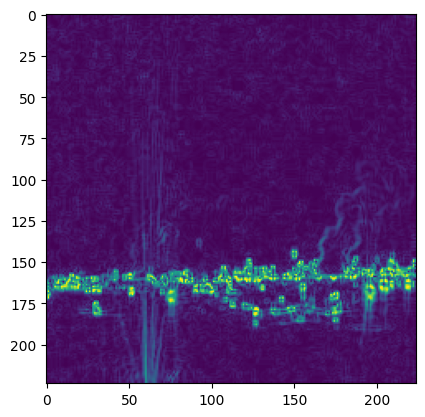

In [37]:
i=10
plt.imshow(x_origin_test2[i])
print('The True PM2.5 Concentraiton is: ', y_test[i])
print('The Predict PM2.5 Concentraiton is: ', y_predict[i])

In [38]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test, y_predict)
print('R score is:', r2score)

R score is: 0.922975342013569


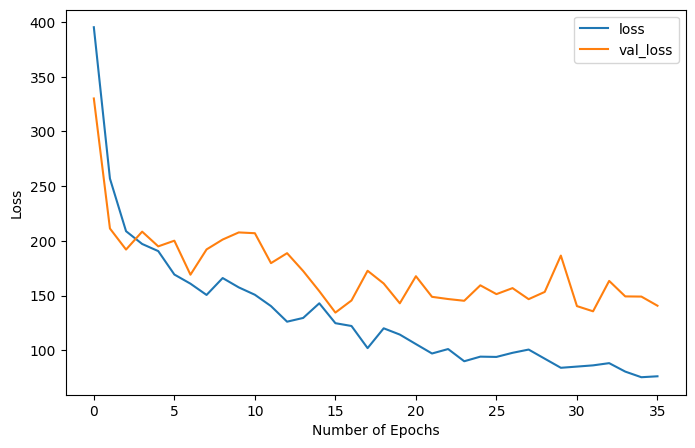

In [39]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [40]:
# loss = model.evaluate(np.array(x_origin_test), np.array(y_test), batch_size=16)
# print('RMSE is :', loss ** 0.5)

In [41]:
y_predict_class = np.zeros(len(y_predict))

for i in range(len(y_predict)):
    if y_predict[i] < 15.5:
        y_predict_class[i] = 0
    elif y_predict[i] >= 15.5 and y_predict[i] < 35.5:
        y_predict_class[i] = 1
    elif y_predict[i] >= 35.5 and y_predict[i] < 54.5:
        y_predict_class[i] = 2
    elif y_predict[i] >= 54.5 and y_predict[i] < 150.5:
        y_predict_class[i] = 3
    elif y_predict[i] >= 150.5 and y_predict[i] < 250.5:
        y_predict_class[i] = 4
    elif y_predict[i] >= 250.5 and y_predict[i] < 500.4:
        y_predict_class[i] = 5
    else:
        print('Exception Occured!')
    
y_predict_class = y_predict_class.astype(int)
    
    
y_predict_class

array([3, 4, 4, 1, 0, 1, 0, 5, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1,
       0, 1, 2, 4, 4, 4, 0, 1, 5, 5, 2, 0, 2, 0, 5, 1, 1, 0, 2, 4, 1, 1,
       4, 4, 5, 5, 4, 3, 0, 1, 5, 5, 0, 1, 2, 4, 1, 4, 1, 0, 4, 5, 4, 1,
       1, 1, 0, 5, 2, 0, 2, 0, 5, 0, 5, 1, 5, 1, 5, 1, 0, 1, 1, 5, 0, 3,
       1, 1, 0, 5, 2, 2, 1, 5, 5, 1])

In [42]:
y_test_class = np.zeros(len(y_test))

for i in range(len(y_test)):
    if y_test[i] >= 0.0 and y_test[i] < 15.5:
        y_test_class[i] = 0
    elif y_test[i] >= 15.5 and y_test[i] < 35.5:
        y_test_class[i] = 1
    elif y_test[i] >= 35.5 and y_test[i] < 54.5:
        y_test_class[i] = 2
    elif y_test[i] >= 54.5 and y_test[i] < 150.5:
        y_test_class[i] = 3
    elif y_test[i] >= 150.5 and y_test[i] < 250.5:
        y_test_class[i] = 4
    elif y_test[i] >= 250.5 and y_test[i] < 500.4:
        y_test_class[i] = 5
    else:
        print('Exception Occured!')

y_test_class = y_test_class.astype(int)
        
        
y_test_class

array([3, 5, 4, 1, 1, 1, 1, 4, 2, 2, 0, 3, 0, 3, 2, 2, 1, 3, 0, 0, 3, 2,
       2, 1, 2, 4, 4, 4, 0, 2, 5, 5, 3, 1, 2, 0, 5, 1, 2, 0, 3, 5, 0, 2,
       4, 4, 5, 5, 4, 4, 0, 2, 4, 4, 0, 3, 3, 4, 2, 4, 2, 1, 5, 5, 4, 0,
       2, 0, 0, 5, 2, 1, 2, 0, 5, 1, 4, 2, 5, 3, 5, 2, 1, 0, 1, 5, 0, 3,
       1, 1, 0, 3, 3, 3, 2, 5, 5, 1])

In [43]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test_class, y_predict_class)

0.5219304388422036

In [44]:
t = 0
n = 0

for i in range(len(y_predict_class)):
    if y_predict_class[i] == y_test_class[i]:
        t = t + 1
    else:
        n = n + 1
        
acc = t / len(y_predict_class)

print('Acc: ', acc, ' True: ', t, ' False: ', n)

Acc:  0.5204081632653061  True:  51  False:  47


In [45]:
#result is the classification result confusion matrix

result = np.zeros((6, 6))

for i in range(len(y_predict_class)):
    result[y_predict_class[i], y_test_class[i]] = result[y_predict_class[i], y_test_class[i]] + 1

result = result.astype(int)    

result

array([[11,  7,  1,  0,  0,  0],
       [ 6,  9, 13,  5,  0,  0],
       [ 0,  0,  6,  6,  0,  0],
       [ 0,  0,  0,  2,  1,  0],
       [ 0,  0,  0,  0, 10,  3],
       [ 0,  0,  0,  1,  4, 13]])

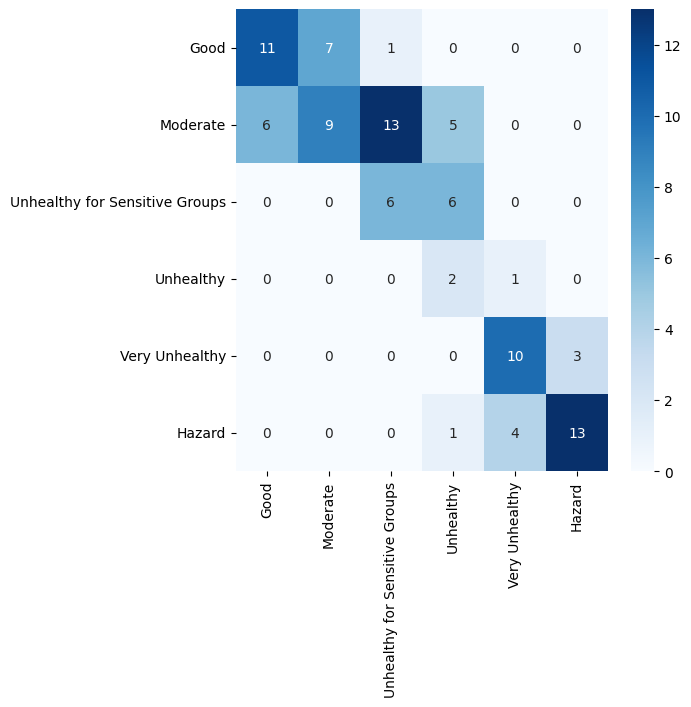

<Figure size 640x480 with 0 Axes>

In [46]:
#X axis is the predict label, Y axis is the true label
import seaborn as s

df = pd.DataFrame(result, index = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy','Hazard'],
                     columns = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy','Hazard'])

plt.figure(figsize = (6,6))

s.heatmap(df, annot=True, fmt='d', cmap='Blues')

fig = plt.gcf()
plt.show()
plt.draw()
# fig.savefig('./Shanghai_Result_img/Classification_result/Origin_VGG16_classification_acc.png', dpi=100, bbox_inches='tight')

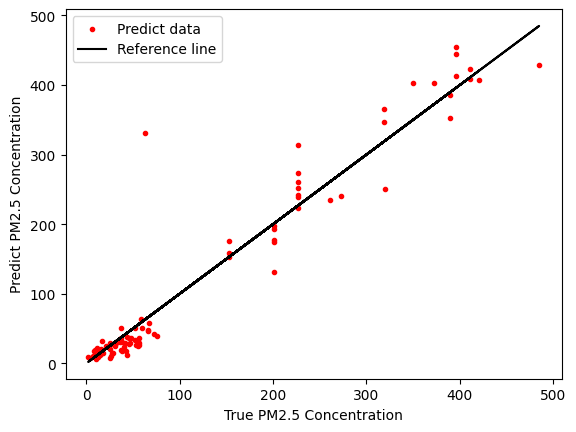

In [47]:
#---Plot Regression Result Image----
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, color = 'red', marker = '.', label = 'Predict data')
plt.plot(y_test, y_test, color = 'black', label = 'Reference line')
plt.xlabel('True PM2.5 Concentration')
plt.ylabel('Predict PM2.5 Concentration')
plt.legend()
# plt.savefig('./Beijing_Result_img/Regression_result/Origin_and_Saturation_AQDC-CNN_Regression_Result.jpg', dpi=200)
plt.show()

In [48]:
# model.save('./model_save/'+'DMK-CNN_Balance_agumentation_night_all_block7.h5')

In [55]:
y_test[2]

201.0

In [57]:
y_pred = np.squeeze(y_predict)

In [58]:
y_pred[3]

20.8717

Class 0 - Mean Error: 4.76871322183048, Standard Deviation: 3.1488797076819877
           25th Percentile: 2.8551511764526367, Median: 3.968756675720215, 75th Percentile: 6.540630340576172, 99th Percentile: 10.127041625976563
Class 1 - Mean Error: 6.853453993797302, Standard Deviation: 5.685660283303271
           25th Percentile: 2.663759231567383, Median: 4.211978912353516, 75th Percentile: 13.049791812896729, 99th Percentile: 15.309929370880127
Class 2 - Mean Error: 13.474596977233887, Standard Deviation: 8.785707764281888
           25th Percentile: 6.00878381729126, Median: 12.758115768432617, 75th Percentile: 18.53311061859131, 99th Percentile: 24.859624862670902
Class 3 - Mean Error: 39.37760312216623, Standard Deviation: 64.06470113074224
           25th Percentile: 18.277603149414062, Median: 24.647875785827637, 75th Percentile: 29.510425090789795, 99th Percentile: 35.335573387146
Class 4 - Mean Error: 25.793689982096353, Standard Deviation: 24.338235908579843
           25th 

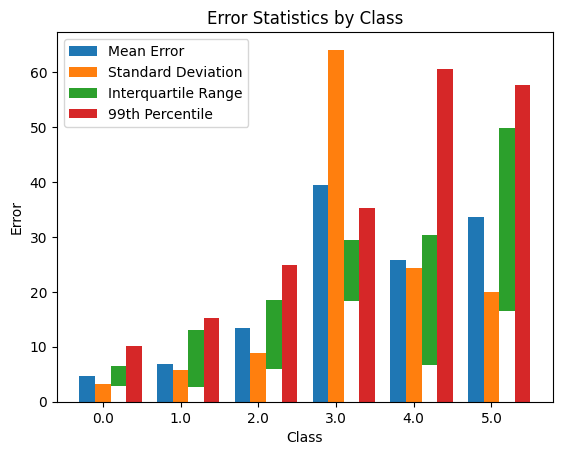

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# 將資料轉換為 NumPy 陣列
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# 計算誤差
error = y_test - y_pred

# 建立空陣列 y_test_class
y_test_class = np.zeros_like(y_test)

# 將 y_test 值劃分為不同的區間
for i in range(len(y_test)):
    if y_test[i] >= 0.0 and y_test[i] < 15.5:
        y_test_class[i] = 0
    elif y_test[i] >= 15.5 and y_test[i] < 35.5:
        y_test_class[i] = 1
    elif y_test[i] >= 35.5 and y_test[i] < 54.5:
        y_test_class[i] = 2
    elif y_test[i] >= 54.5 and y_test[i] < 150.5:
        y_test_class[i] = 3
    elif y_test[i] >= 150.5 and y_test[i] < 250.5:
        y_test_class[i] = 4
    elif y_test[i] >= 250.5 and y_test[i] < 500.4:
        y_test_class[i] = 5

# 計算每個類別的誤差平均值、標準差和百分位數（取絕對值）
classes = np.unique(y_test_class)
mean_error = []
std_error = []
percentile_25 = []
median_error = []
percentile_75 = []
percentile_99 = []

for cls in classes:
    cls_error = error[y_test_class == cls]
    abs_error = np.abs(cls_error)  # 將誤差值取絕對值
    mean = np.mean(abs_error)
    std = np.std(abs_error)
    p25 = np.percentile(abs_error, 25)  # 計算百分位數（25%）
    median = np.median(abs_error)  # 計算中位數
    p75 = np.percentile(abs_error, 75)  # 計算百分位數（75%）
    p99 = np.percentile(abs_error, 90)  # 計算百分位數（99%）
    mean_error.append(mean)
    std_error.append(std)
    percentile_25.append(p25)
    median_error.append(median)
    percentile_75.append(p75)
    percentile_99.append(p99)

# 轉換成 NumPy 陣列
mean_error = np.array(mean_error)
std_error = np.array(std_error)
percentile_25 = np.array(percentile_25)
median_error = np.array(median_error)
percentile_75 = np.array(percentile_75)
percentile_99 = np.array(percentile_99)

# 列印每個類別的誤差統計數據
for i, cls in enumerate(classes):
    print(f"Class {int(cls)} - Mean Error: {mean_error[i]}, Standard Deviation: {std_error[i]}")
    print(f"           25th Percentile: {percentile_25[i]}, Median: {median_error[i]}, 75th Percentile: {percentile_75[i]}, 99th Percentile: {percentile_99[i]}")

# 繪製誤差平均值、標準差和百分位數的長條圖
x = np.arange(len(classes))
width = 0.2

fig, ax = plt.subplots()
ax.bar(x - width, mean_error, width, label='Mean Error')
ax.bar(x, std_error, width, label='Standard Deviation')
ax.bar(x + width, percentile_75 - percentile_25, width, bottom=percentile_25, label='Interquartile Range')
ax.bar(x + 2 * width, percentile_99, width, label='99th Percentile')

ax.set_xlabel('Class')
ax.set_ylabel('Error')
ax.set_title('Error Statistics by Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

plt.show()


In [52]:
error[2]


array([-107.21984863,   86.78015137,   26.78015137, -149.21984863,
       -145.21984863, -157.21984863, -149.21984863,   52.28015137,
       -126.21984863, -128.21984863, -160.21984863, -114.21984863,
       -166.21984863, -119.21984863, -136.21984863, -122.21984863,
       -143.21984863, -119.21984863, -170.21984863, -159.21984863,
       -118.21984863, -138.21984863, -130.21984863, -158.21984863,
       -130.21984863,  -21.21984863,   26.78015137,  -21.21984863,
       -164.21984863, -138.21984863,  144.78015137,  236.78015137,
       -108.21984863, -147.21984863, -137.21984863, -172.21984863,
        221.78015137, -153.21984863, -138.21984863, -164.21984863,
        -98.21984863,  145.78015137, -165.21984863, -137.21984863,
         52.28015137,   26.78015137,  197.78015137,  215.78015137,
         26.78015137,   26.78015137, -163.21984863, -133.21984863,
         52.28015137,   52.28015137, -161.21984863, -119.21984863,
       -102.21984863,  -21.21984863, -121.21984863,   52.28015